In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from scipy import stats as stats
from MSMRD.analysis import bootstrapping as btst
plt.style.use('paperPlot')

# On rates for different concentrations

In [2]:
radii = np.array([2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5])
#FPTs_onH_smallR = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/rates/fpts_on_10000_runs_lag0.01_R2.0_125files_240partitions.p'))
FPTs_onH = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/rates/fpts_on_10000_runs_lag0.05_R2.5_120files_240partitions.p'))
FPTs_onB = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/rates/fpts_on_10000_runs_benchmark_dt0.001.p'))

In [3]:
#k_onH_smallR = np.array([1./np.mean(fpts) for fpts in FPTs_onH_smallR])
k_onH = np.array([1./np.mean(fpts) for fpts in FPTs_onH])
k_onB = np.array([1./np.mean(fpts) for fpts in FPTs_onB])
c = [1./np.power(rad, 3) for rad in radii]

In [4]:
fpt_onH_err = []
for fpt in FPTs_onH:
    m, v, std = stats.bayes_mvs(fpt, alpha=0.95)
    fpt_onH_err.append(np.diff(m.minmax)[0]/2)
fpt_onH_err = np.array(fpt_onH_err)
fpt_onB_err = []
for fpt in FPTs_onB:
    m, v, std = stats.bayes_mvs(fpt, alpha=0.95)
    fpt_onB_err.append(np.diff(m.minmax)[0]/2)
fpt_onB_err = np.array(fpt_onH_err)

In [5]:
fpt_onH_boot_err = []
for fpt in FPTs_onH:
    fpt_onH_boot_err.append(2*btst.estimateConfidenceInterval(fpt, 10000))
fpt_onB_boot_err = []
for fpt in FPTs_onB:
    fpt_onB_boot_err.append(2*btst.estimateConfidenceInterval(fpt, 10000))

In [6]:
means = btst.estimateMeanDistribution(FPTs_onH[0], 10000)

In [7]:
print 2*np.std(1./means)
print (k_onH*k_onH*fpt_onH_boot_err)[0]
print (k_onH*k_onH*stats.sem(FPTs_onH[0]))[0]*2.575

0.00952666585831
0.00959996383725
0.0123700641651


In [8]:
np.diff(stats.t.interval(.99, len(1./means)-1, loc=np.mean(1./means), scale=np.std(1./means)))[0]/2

0.012271875111969699

In [9]:
k_onH_err = k_onH*k_onH*fpt_onH_err
k_onB_err = k_onB*k_onB*fpt_onB_err

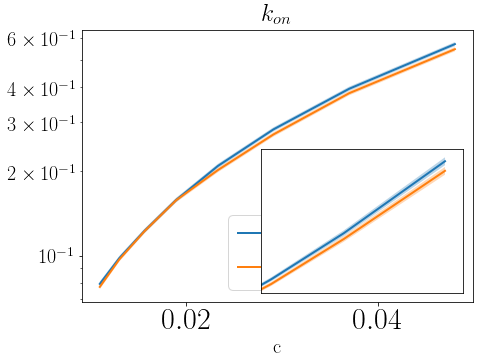

In [11]:
plt.title('$k_{on}$')
plt.semilogy(c, k_onH, '-', label='hybrid $R=2.5$')
plt.semilogy(c, k_onB, '-', label='reference')
plt.xlabel('c')
plt.legend()
plt.fill_between(c, k_onH+k_onH*k_onH*fpt_onH_boot_err, k_onH-k_onH*k_onH*fpt_onH_boot_err, alpha=0.3)
plt.fill_between(c, k_onB+k_onB*k_onB*fpt_onB_boot_err, k_onB-k_onB*k_onB*fpt_onB_boot_err, alpha=0.3)
ax2 = plt.axes([.48, .15, .4, .4])
ax2.plot(c, k_onH)
ax2.plot(c, k_onB)
ax2.fill_between(c, k_onH+k_onH*k_onH*fpt_onH_boot_err, k_onH-k_onH*k_onH*fpt_onH_boot_err, alpha=0.3)
ax2.fill_between(c, k_onB+k_onB*k_onB*fpt_onB_boot_err, k_onB-k_onB*k_onB*fpt_onB_boot_err, alpha=0.3)
ax2.set_xlim(0.028, 0.05)
ax2.set_ylim(0.25, 0.6)
plt.setp(ax2, xticks=[0], yticks=[])

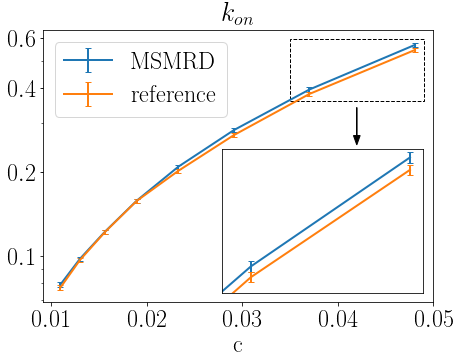

In [15]:
mpl.rcParams.update({'ytick.labelsize':24, 'xtick.labelsize':24, 'axes.labelsize':24, 'axes.titlesize':26})
fig, axs = plt.subplots(nrows=1, ncols=1)
ax = axs
ax.set_title('$k_{on}$')
ax.errorbar(c, k_onH, yerr=k_onH*k_onH*fpt_onH_boot_err, label='MSMRD', capsize=3)
ax.errorbar(c, k_onB, yerr=k_onB*k_onB*fpt_onB_boot_err, label='reference', capsize=3)
#plt.errorbar(c, k_onB, 'x-', yerr=k_onB_err, label='benchmark')
ax.set_xlabel('c')
ax.set_yscale('log')
#ax.semilogy()
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
plt.setp(ax, yticks=[])
plt.setp(ax, yticks=[0.1, 0.2, 0.4, 0.6])
plt.setp(ax, xticks=[0.01, 0.02, 0.03, 0.04, 0.05])
#plt.ticklabel_format(style='sci', labelOnlyBase=True)
plt.legend()
ax2 = plt.axes([.48, .15, .4, .4])
ax2.errorbar(c, k_onH, yerr=k_onH*k_onH*fpt_onH_boot_err, capsize=3)
ax2.errorbar(c, k_onB, yerr=k_onB*k_onB*fpt_onB_boot_err, capsize=3)
ax2.set_xlim(0.035, 0.049)
ax2.set_ylim(0.36, 0.585)
ax2.set_yscale('log', subsy=[])
ax2.set_yticklabels(())
plt.setp(ax2, xticks=[], yticks=[])
ax.add_patch(mpl.patches.Rectangle((0.035, 0.36), 0.014, 0.235, fill=False, lw=1, linestyle='dashed'))
ax.arrow(0.042, 0.34, 0, -0.07, fc='k', head_length=0.02, width=0.00002, head_width=0.0007, fill=True)
#plt.xlim(0.03-0.001, 0.03+0.001)
#plt.ticklabel_format(labelOnlyBase=True)
#plt.savefig('../Paper/figs/asym3D/Kon.pdf', bbox_inches='tight')

In [118]:
print c
print k_onB

[0.048084147257700979, 0.037037037037037035, 0.029130632680928539, 0.023323615160349854, 0.018962962962962963, 0.015625, 0.013026663952778343, 0.010973936899862825]
[ 0.54576511  0.38007391  0.27088019  0.20204301  0.15770334  0.12195549
  0.09702721  0.07728274]


# Relative error to hybrid

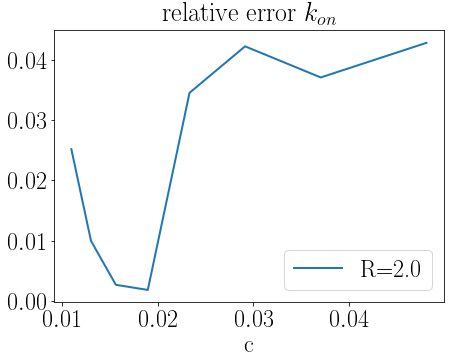

In [17]:
plt.plot(c, (k_onH-k_onB)/k_onB, label='R=2.0')
plt.xlabel('c')
plt.title('relative error $k_{on}$')
plt.legend()

In [18]:
FPTs_offH = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/rates/fpts_off10000_runs_lag0.05_R2.5_10files_240partitions.p'))
FPTs_offB = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/rates/fpts_off_10000_runs_benchmark_dt0.001.p'))

# Off rates for radius of R=2.7

In [19]:
koff_H = 1./np.mean(FPTs_offH)
mH, v, std = stats.bayes_mvs(FPTs_offH, alpha=0.95)
koff_B = 1./np.mean(FPTs_offB)
mB, v, std = stats.bayes_mvs(FPTs_offB, alpha=0.95)
print koff_H
print np.diff(mH.minmax)[0]/2*koff_H*koff_H
print koff_B
print np.diff(mB.minmax)[0]/2*koff_B*koff_B

0.400098082711
0.00237698367594
0.402682268379
0.00236216779175


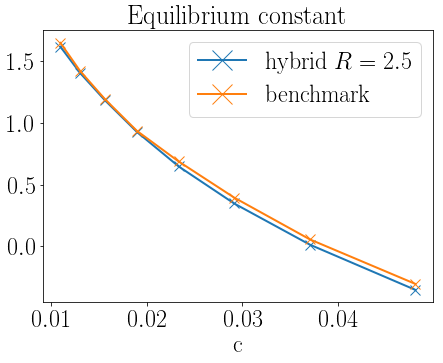

In [20]:
#plt.plot(c, np.log(koff_H/k_onH_smallR), 'x-', label='hybrid $R=2.0$')
plt.plot(c, np.log(koff_H/k_onH), 'x-', label='hybrid $R=2.5$')
plt.plot(c, np.log(koff_B/k_onB), 'x-', label='benchmark')
plt.xlabel('c')
plt.legend()
plt.title('Equilibrium constant')
#plt.savefig('../Paper/figs/asym3D/Keq.pdf', bbox_inches='tight')

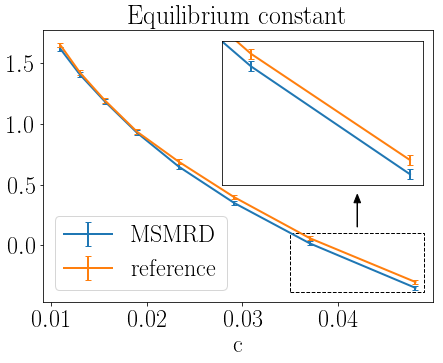

In [23]:
mpl.rcParams.update({'ytick.labelsize':24, 'xtick.labelsize':24, 'axes.labelsize':24, 'axes.titlesize':26})
fig, axs = plt.subplots(nrows=1, ncols=1)
ax = axs
ax.set_title('$k_{on}$')
ax.errorbar(c, np.log(koff_H/k_onH), yerr=k_onH*fpt_onH_boot_err, label='MSMRD$', capsize=3)
ax.errorbar(c,  np.log(koff_B/k_onB), yerr=k_onB*fpt_onB_boot_err, label='reference', capsize=3)
#plt.errorbar(c, k_onB, 'x-', yerr=k_onB_err, label='benchmark')
plt.xlabel('c')
plt.legend(loc=3)
plt.title('Equilibrium constant')
#plt.xlim(0.03-0.001, 0.03+0.001)
ax2 = plt.axes([.48, .45, .4, .4])
ax2.errorbar(c, np.log(koff_H/k_onH), yerr=k_onH*fpt_onH_boot_err, capsize=3)
ax2.errorbar(c, np.log(koff_B/k_onB), yerr=k_onB*fpt_onB_boot_err, capsize=3)
ax2.set_xlim(0.035, 0.049)
ax2.set_ylim(-0.39, 0.1)
ax2.set_yticklabels(())
plt.setp(ax2, xticks=[], yticks=[])
ax.add_patch(mpl.patches.Rectangle((0.035, -0.39), 0.014, 0.49, fill=False, lw=1, linestyle='dashed'))
ax.arrow(0.042, 0.15, 0, 0.2, fc='k', head_length=0.07, width=0.00003, head_width=0.0007, fill=True)
#plt.xlim(0.03-0.001, 0.03+0.001)
#plt.savefig('../Paper/figs/asym3D/Keq.pdf', bbox_inches='tight')

In [175]:
print np.log(koff_H/k_onH)

[-0.35236734  0.01496916  0.34869878  0.64931306  0.92915047  1.18536436
  1.40679295  1.61939008]


In [177]:
print c

[0.048084147257700979, 0.037037037037037035, 0.029130632680928539, 0.023323615160349854, 0.018962962962962963, 0.015625, 0.013026663952778343, 0.010973936899862825]
